In [ ]:
import pandas as pd
import matplotlib as mt
import os
import traceback

#refactor the who code to the new database


#this will give you a list of stocks from the folder
cleaned_data_path='/workspaces/TosChart/TosChart/cleaned_data'

stocks=os.listdir(cleaned_data_path)

lists=[]
####
##cleans all the strategy file so they match the same format
###
for stock in stocks:
    try:
        dt=pd.read_csv(cleaned_data_path+'/'+stock)
        dt.drop(columns=['Price','Amount','Position','P/L', 'Unnamed: 9','Side'], inplace=True)

        symb=dt.columns[0]
        date=dt.columns[2]

        ####
        for ind,num in enumerate(dt[date]):
            if ind%2!=0:
                if ind>0:
                    dt[date][ind-1]+='-'+num
            #trying somethin

        dt['Trade P/L']=dt['Trade P/L'].shift(periods=-1)

        for i,id in enumerate(dt[symb]):
            if int(id)%2==0:
                dt.drop(i, inplace=True)

        dt.dropna(inplace=True)
        hold=[]

        #creating holding period because i want to know how long i held the stock
        for index,date in enumerate(dt[date]):
            open, close=date.split('-')
            hold.append(pd.to_datetime(close)-pd.to_datetime(open))
        dt['Holding Time']=hold

        g=dt.columns[0].split()
        dt['Id']=g[1]
        dt.drop(columns=symb, inplace=True)
        lists.append(dt)
    except Exception as e:
        print(e)
        continue
print(dt.head())

    ##can i append a 

/tmp/ipykernel_10887/2014888373.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dt[date][ind-1]+='-'+num
/tmp/ipykernel_10887/2014888373.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



Error tokenizing data. C error: Expected 10 fields in line 3, saw 12



/tmp/ipykernel_10887/2014888373.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dt[date][ind-1]+='-'+num
/tmp/ipykernel_10887/2014888373.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



              Strategy         Date/Time Trade P/L Holding Time    Id
0  keepbusy_cross(Buy)   10/6/06-11/7/06  ($26.15)      32 days  SIGI
2  keepbusy_cross(Buy)  12/21/12-4/26/13    $39.78     126 days  SIGI
4  keepbusy_cross(Buy)    4/5/19-9/10/19   $139.71     158 days  SIGI
6  keepbusy_cross(Buy)  9/22/23-10/13/23  ($42.72)      21 days  SIGI


/tmp/ipykernel_10887/2014888373.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dt[date][ind-1]+='-'+num
/tmp/ipykernel_10887/2014888373.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [25]:
comb=pd.concat(lists)
comb['Trade P/L'] = comb['Trade P/L'].str.replace(r'[\$,]', '', regex=True).replace(r'\((\d+(\.\d+)?)\)', r'-\1', regex=True)
comb['Trade P/L']=pd.to_numeric(comb['Trade P/L'])

comb['Trade P/L'].describe()

/tmp/ipykernel_10887/3583032429.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comb=pd.concat(lists)


count    437.000000
mean      20.959130
std       97.543918
min     -175.360000
25%      -26.740000
50%      -13.110000
75%       19.250000
max      620.960000
Name: Trade P/L, dtype: float64

In [26]:
sell=[]
for num in comb['Date/Time']:
    b, s=num.split('-')
    sell.append(s)
comb['Date']=sell
df=comb

/tmp/ipykernel_10887/1341245126.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


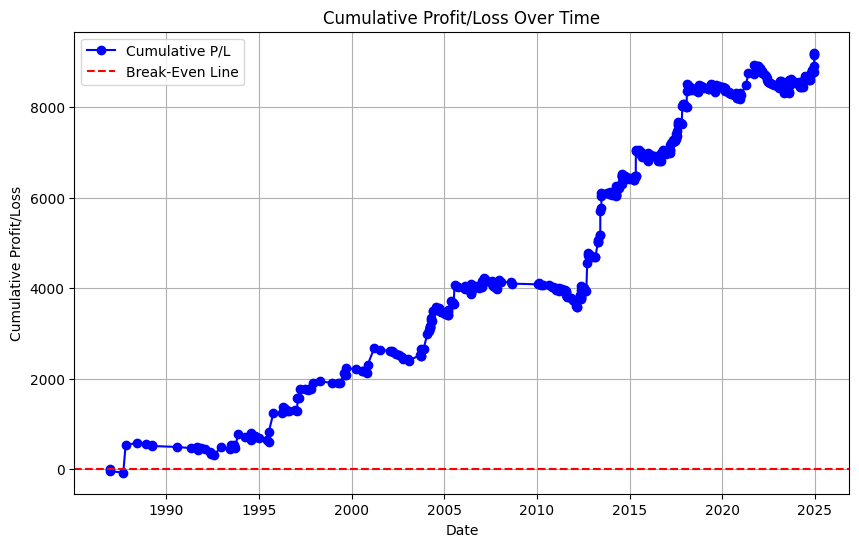

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate cumulative P/L
df['Trade P/L'] = df['Trade P/L'].cumsum()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Trade P/L'], marker='o', label='Cumulative P/L', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Break-Even Line')
plt.title('Cumulative Profit/Loss Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
win=0
loss=0 
for t in comb['Trade P/L']:
    if t>0:
        win+=1
    if t<0:
        loss+=1
print(win, loss)

136 300
